**Advanced Data Analysis; Multiple Linear Regression and One-way ANOVA using R**

**Overview**

Before undertaking this analysis it was important to look at the many other factors that influence crime that are correlated with poverty and population such as the following;

•	Unemployment may increase poverty and at the same time lead to more pressure to carry crime due to difficult circumstances and the need to sustain income.
•	Personal income per capita, which is inversely correlated with the poverty level. However because of social class gaps, personal income per capita rates may not affect poverty to a great extent (the income may be concentrated in a small percentage of the population).

For the purpose of this analysis it was decided to study population density (population per square mile) as a factor that influences crime rates. For example the impact of living conditions (Government housing schemes/regions in comparison to apartments etc) it is also likely to be correlated with both poverty and crime. Studies in the past have found that highly density populated areas tend to have higher poverty rates. Finally the impact of the % of population in state - living below the poverty level and the metropolitan population as % of state population

**Multiple Linear Regression and One-way ANOVA using R**

**Crime Statistics Analysis – Variable Selection, Model Construction and notes on Correlation.**
	
Y; Crime = The total number of crimes in 1993 per 100,000 population by each US State.
X1;pov = The total % of population in each US state that are surviving below the poverty line. Poverty is less correlated to crime compared to the other variables which is a surprise but still falls into the label of directly correlated to some little degree of acceptance. This variable is weakly indirectly correlated to the variable metro (-0.08304677).
X2; metro = The % metropolitan population of each state. A correlation of (0.5439765) highlighted in the results below indicate a direct correlation with Crime rates for this period.
X3; popdens = The population density per square mile. Correlation Matrix Graphic 2 below indicates that this variable is reasonably directly correlated with crime at (0.6118508) intermediate level. This variable is also intermediately correlated with but Metropolitan population and Poverty.

*Data Source: Statistical Abstract of the United States, 2009, and 2010[website: https://www.census.gov/library/publications/time-series/statistical_abstracts.html]


In [1]:
data <- read.csv('C:\\Clusters\\Crime 2009 2010.csv')
str(data)

'data.frame':	51 obs. of  5 variables:
 $ Crime  : num  4338 3567 3725 4415 3202 ...
 $ pov    : num  19 9.9 17.4 18.8 15.8 13.4 10.1 11.8 19.2 16.5 ...
 $ metro  : num  71.5 67.4 92.5 60.3 97.7 ...
 $ popdens: num  94.4 1.2 56.3 56 239.1 ...
 $ Year   : int  2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 ...


In [2]:
head(data)

Crime,pov,metro,popdens,Year
4337.5,19.0,71.46,94.4,2009
3567.1,9.9,67.36,1.2,2009
3725.2,17.4,92.53,56.3,2009
4415.4,18.8,60.27,56.0,2009
3201.6,15.8,97.73,239.1,2009
3024.5,13.4,86.33,48.5,2009


In [3]:
summary(data)

     Crime           pov            metro           popdens      
 Min.   :2026   Min.   : 8.30   Min.   : 29.66   Min.   :   1.2  
 1st Qu.:2809   1st Qu.:12.80   1st Qu.: 63.20   1st Qu.:  45.8  
 Median :3525   Median :14.60   Median : 74.88   Median : 101.2  
 Mean   :3440   Mean   :14.77   Mean   : 74.01   Mean   : 384.4  
 3rd Qu.:4040   3rd Qu.:17.45   3rd Qu.: 87.78   3rd Qu.: 221.4  
 Max.   :6101   Max.   :22.40   Max.   :100.00   Max.   :9856.5  
      Year     
 Min.   :2009  
 1st Qu.:2009  
 Median :2010  
 Mean   :2010  
 3rd Qu.:2010  
 Max.   :2010  

Warning message:
"package 'mlbench' was built under R version 3.2.5"Warning message:
"package 'caret' was built under R version 3.2.5"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.2.5"

            Crime        pov      metro   popdens
Crime   1.0000000  0.5521535  0.2844442 0.4229719
pov     0.5521535  1.0000000 -0.0645897 0.1356360
metro   0.2844442 -0.0645897  1.0000000 0.3116369
popdens 0.4229719  0.1356360  0.3116369 1.0000000


Warning message:
"package 'corrplot' was built under R version 3.2.5"

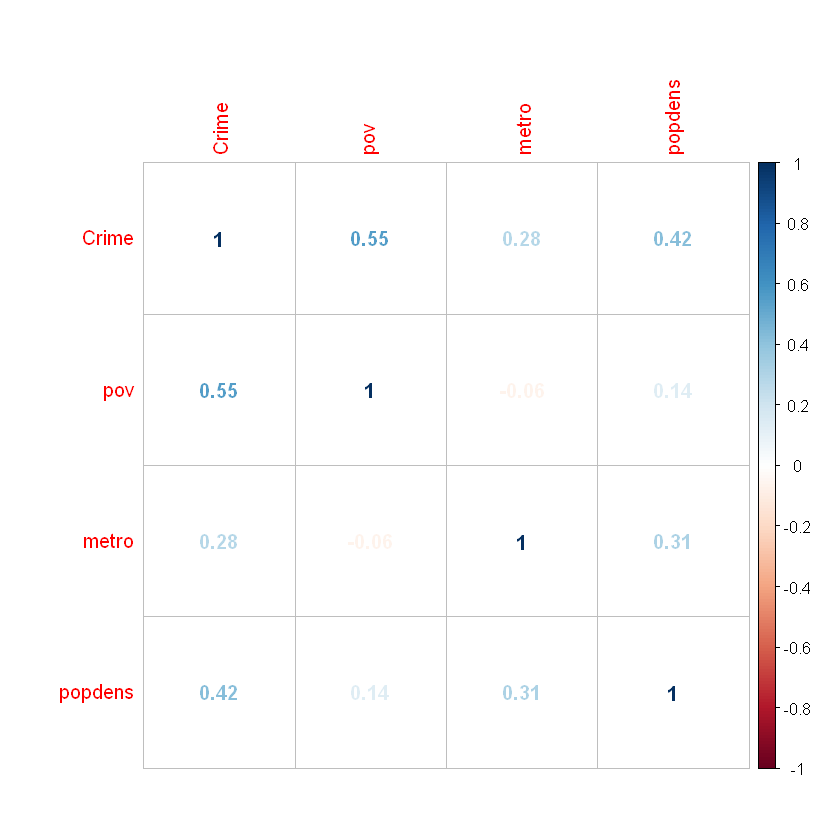

In [4]:
#Correlation Matrix; Analyses of correlations between each variable
library(mlbench)
library(caret)
correlationMatrix <- cor(data[,1:4])
print(correlationMatrix)
library(corrplot)
corrplot(correlationMatrix, method="number")

**Correlation** 

Finding the relationship between two quantitative variables without being able to infer causal relationships
Correlation is a statistical technique used to determine the degree to which two variables are related

Before we carry out a simple linear regression between two variables we need to see if they are related. 

Correlation coefficient is also known as Pearson Product-Moment Correlation Coefficient (r).
It is a measure of the degree of linear relationship between two variables, usually labeled X and Y.

…think of it as a meaure of ‘association’

While in regression the emphasis is on predicting one variable from the other, in correlation the emphasis is on the degree to which a linear model may describe the relationship between two variables.

The value of r ranges between ( -1) and ( +1)
The value of r denotes the strength of the association we can see from the correlation matrix above that the poverty variable has a higher correlation 0.55 value than the other variables with metropoliton areas having a low correlation with crime rates.


Warning message:
"package 'UsingR' was built under R version 3.2.5"Loading required package: MASS
Loading required package: HistData
Warning message:
"package 'HistData' was built under R version 3.2.5"Loading required package: Hmisc
Warning message:
"package 'Hmisc' was built under R version 3.2.5"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.2.5"
Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units


Attaching package: 'UsingR'

The following object is masked from 'package:survival':

    cancer



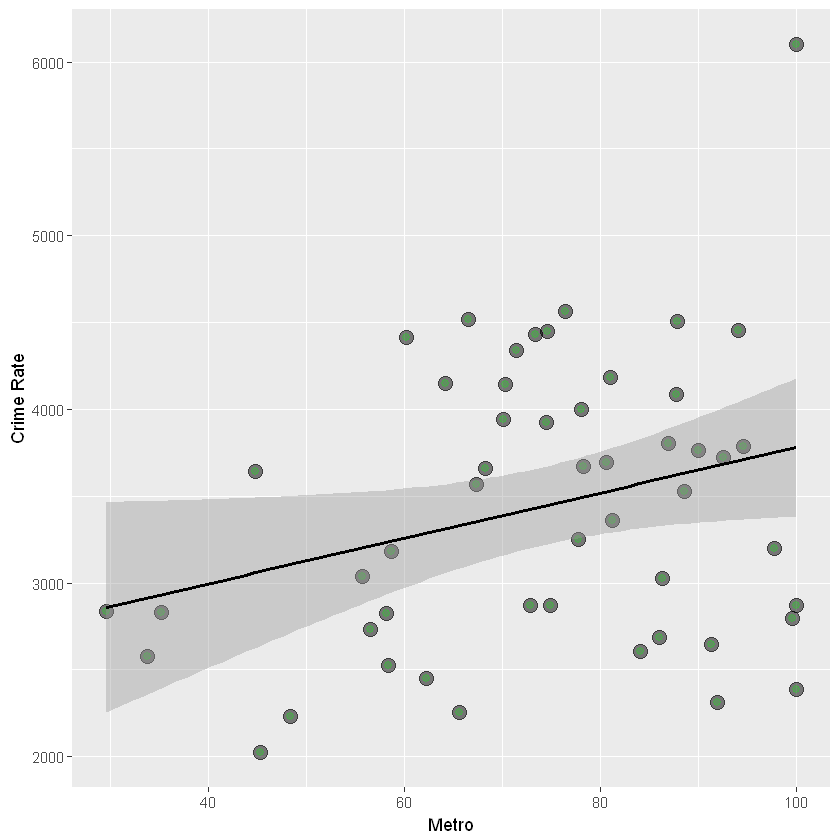

In [5]:
#Staistical Linear regression model between two variables
library(UsingR)
library(ggplot2)
graph = ggplot(data, aes(x = metro, y = Crime))
graph = graph + xlab("Metro")
graph = graph + ylab("Crime Rate")
graph = graph + geom_point(size = 4, colour = "black", alpha=0.5)
graph = graph + geom_point(size = 2, colour = "green", alpha=0.2)
graph = graph + geom_smooth(method = "lm", colour = "black")
graph

First look at the plot. You interpret a scatterplot by looking for trends in the data as you go from left to right:

If the data show an uphill pattern as you move from left to right, this indicates a positive relationship between X and Y. As the X-values increase (move right), the Y-values increase (move up) a certain amount.
If the data show a downhill pattern as you move from left to right, this indicates a negative relationship between X and Y. As the X-values increase (move right) the Y-values decrease (move down) by a certain amount.
If the data don’t seem to resemble any kind of pattern (even a vague one), then no relationship exists between X and Y.
A linear pattern is where the data has a general look of a line going uphill or downhill.


In [6]:
#linear regression Model with two variables

lm.fit <- lm(Crime ~ metro, data = data)
coef(lm.fit)


(Intercept)       metro 
 2471.86802    13.07928

The above function coef() grabs the fitted coefficients and conveniently names them for you. Therefore,we estimate an expected 13.07 increase in crime for every increase percentage of metropoliton population.The intercept is the expected 2471.86

In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the "errors", 
that is, the difference between the estimator and what is estimated. MSE is a risk function, corresponding 
to the expected value of the squared error loss or quadratic loss.
https://en.wikipedia.org/wiki/Mean_squared_error


In [7]:
#make a prediction using metro variable
lm.predict <- predict(lm.fit)
mean((lm.predict - data$metro)^2) 

[1] 11374791

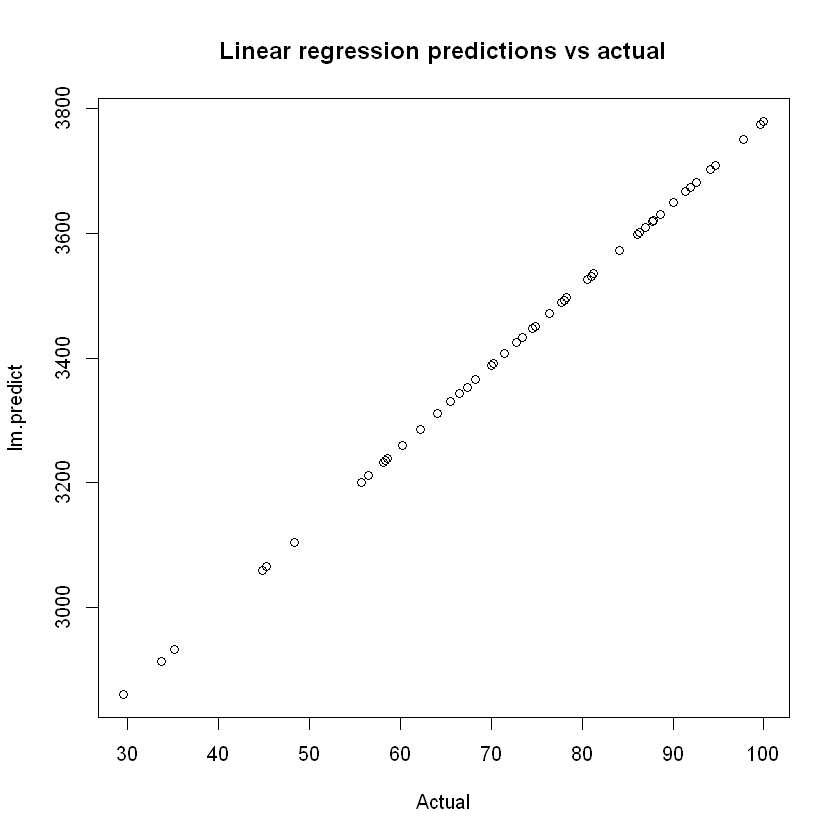

In [8]:
#predictions vs actual plot
plot(data$metro, lm.predict, main="Linear regression predictions vs actual", xlab="Actual")

In [9]:
#residuals
y <- data$Crime; x <- data$metro; n <- length(y)
fit <- lm(y ~ x)
## The easiest way to get the residuals
res <- resid(fit)
## Obtain the residuals manually, get the predicted Ys first
yhat <- predict(fit)
## The residuals are y - yhat. Let's check by comparing this
## with R's build in resid function
max(abs(res -(y - yhat)))

## Let's do it again hard coding the calculation of Yhat
max(abs(res - (y - coef(fit)[1] - coef(fit)[2] * x)))


[1] 5.570655e-12

[1] 5.684342e-12

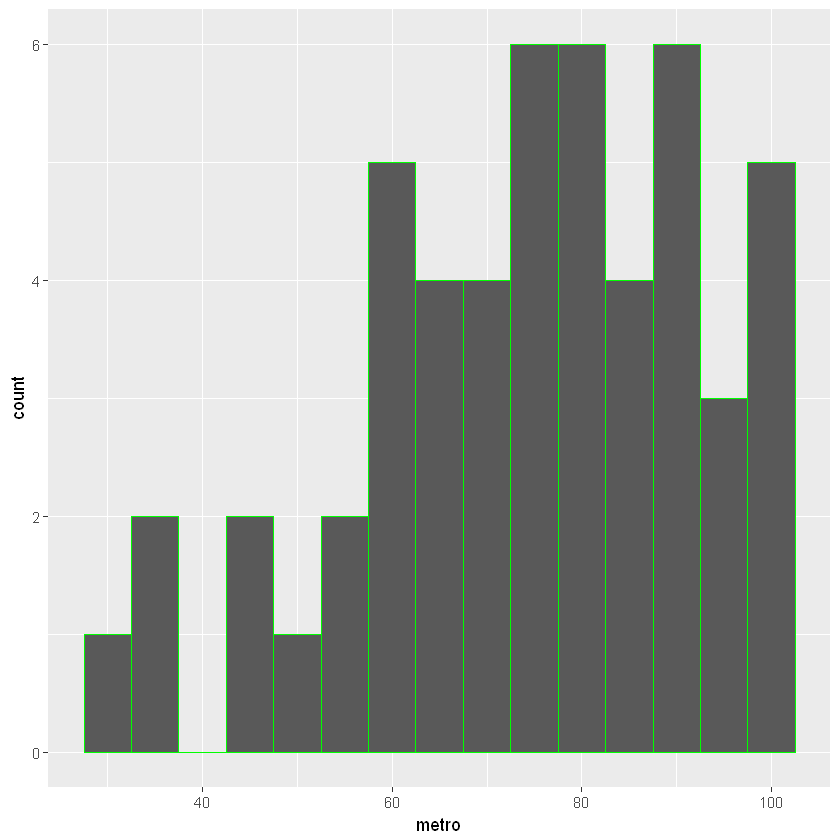

In [10]:
# A look at the distribution of the metro variable
ggplot(data = data, aes(x = metro)) +
geom_histogram(binwidth = 5, color = "green")

**Multivariable Regression: Part B**

X1 = pov, X2 = metro , X3 = popdens and Y = Crime

1.	Regression output with comments on the significance of the slope coefficients for all X variables.

2.	Interpretation the regression coefficients

3.	Hypothesis test of the R-squared coefficient (ANOVA test) with comments on the multiple regression model relative to analysis in part B.


In [11]:
#import data as a dataframe
crime <- read.csv( "C:/Clusters/Crime Statistics USA.csv", header=TRUE)
head(crime)

Crime,pov,metro,popdens
4879,17.4,67.4,82.5
5568,9.1,41.8,1.1
7432,15.4,84.7,34.6
4811,20.0,44.7,46.6
6457,18.2,96.7,200.1
5527,9.9,81.8,34.4


In [12]:
summary(crime)

     Crime            pov            metro           popdens      
 Min.   : 2533   Min.   : 8.00   Min.   : 24.00   Min.   :   1.1  
 1st Qu.: 4140   1st Qu.:10.70   1st Qu.: 49.55   1st Qu.:  34.5  
 Median : 4894   Median :13.20   Median : 69.80   Median :  82.5  
 Mean   : 5098   Mean   :14.35   Mean   : 67.47   Mean   : 352.5  
 3rd Qu.: 5834   3rd Qu.:17.40   3rd Qu.: 83.95   3rd Qu.: 191.2  
 Max.   :11761   Max.   :26.40   Max.   :100.00   Max.   :9482.8  

,Crime,pov,metro,popdens
Crime,1.0000000,0.33847045,0.54397653,0.6118508
pov,0.3384705,1.00000000,-0.08304677,0.3300112
metro,0.5439765,-0.08304677,1.00000000,0.3158778
popdens,0.6118508,0.33001118,0.31587775,1.0000000


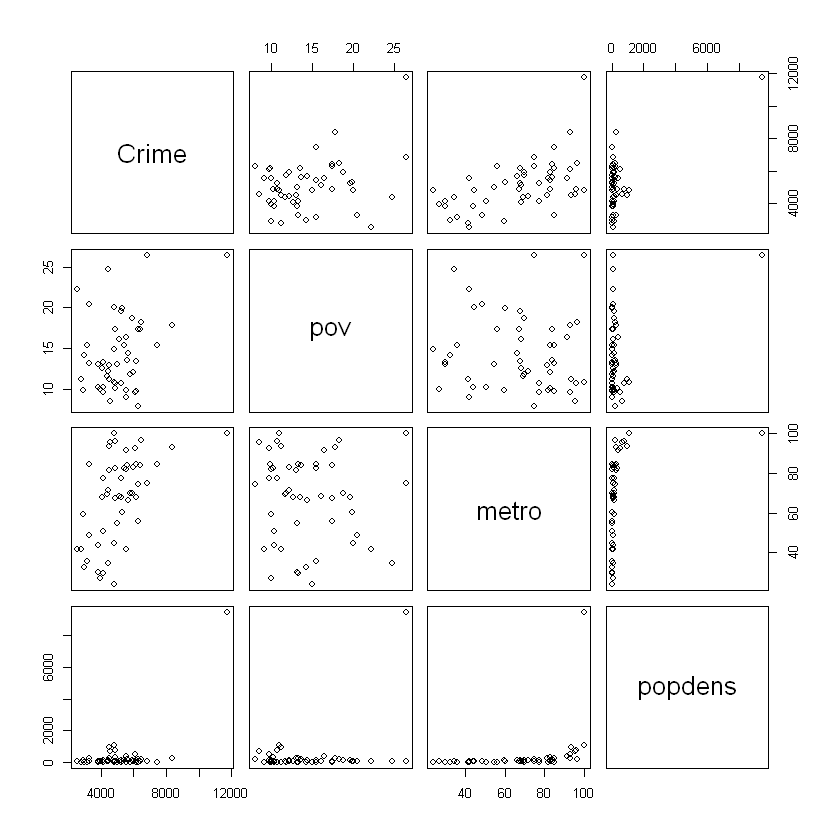

In [13]:
cor(crime)
plot(crime)
pairs(crime)

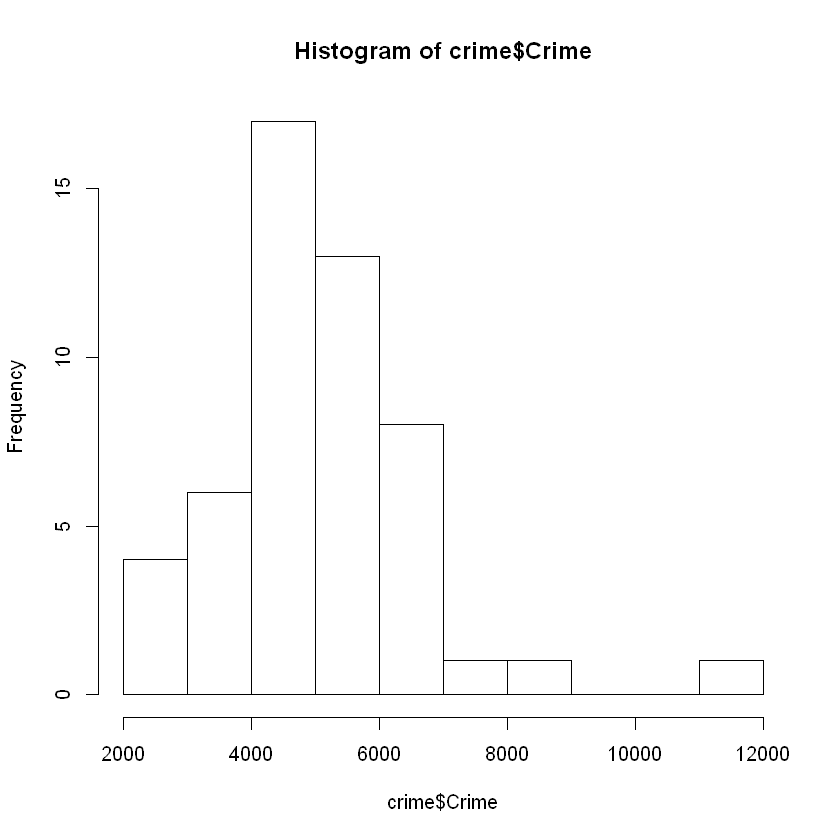

In [14]:
#Histogram of the Crime variable
hist(crime$Crime)

**Analysing the Histogram of the crime variable**

From the above histogram we can see that most of the values for the Y dependent variable sit within the parameters of what is known as a normal distribution pattern, however there is evidence of a possible outlier (11,000 to 12000) to the right end of the histogram, it is not always the situation that values can occur where a normal curve for a distribution has sunk down to zero.

It is important to analyze in this case the two main measures of normal distribution these include both mean &standard deviation (sd). The generated histogram based on the crime variable is generally broadly symmetrical in shape, the highest block is between the 4000.00 and 5000.00 crime rate. The top most point of the normal distribution is the mean with the standard deviation indicating the level of spread there is away from the calculated mean. 

The center column of the histogram data shows a tail off to the right and left. But it can be viewed that the distribution is slightly skewed to the right indicated by the higher number of blocks to the right of the highest block. However it can be argued that the overall appearance of the bars of the distribution are relatively normal.

Measures of spread;


Answer; 1544.348/5098.33 =3.3021

Normally one would prefer a lower measure of spread to higher ones indicating that the measures of average are more representative of the data analyzed. In terms of possible outliers in the values, a quick impression can be gathered by calculating the mean ± two standard deviations as shown below:

Mean + 2 (standard deviations) = 5098.33 + 2(1544.348) = 8187.026
Mean - 2 (standard deviations) = 5098.33- 2(1544.348) = 2009.634

We can see that the values are within the range 2009.634 and 8187.026. However we can see one outlier between 11000 & 12000 that may be effecting the overall distribution and spread of the data on the right. This possible existence of outlier values can be explored further via descriptive statistics and a box-plot. 

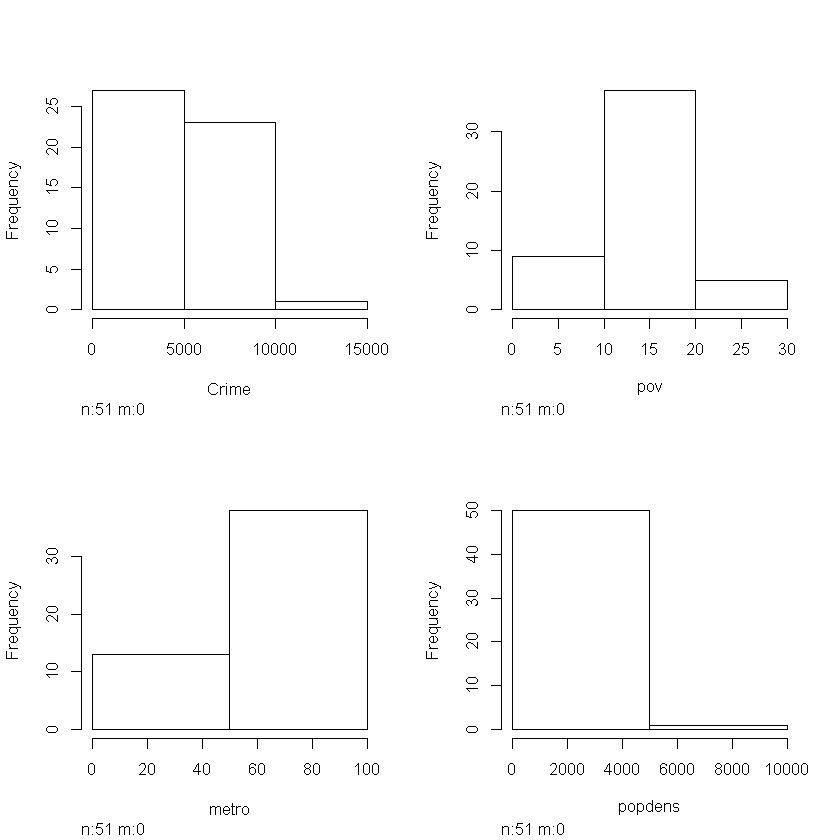

In [15]:
hist(crime)

**Box plot show the presence of an extreme outlier**

The above box plot is displayed to demonstrate the distribution of the crime variable. The extended lines from the end of the box represent the lowest and highest values that are not outliers. The box plot will show that an observation is an outlier if it lays more than 1.5 times from the Inter quartile range. In the above plot the outlier is marked by an asterisk which is usually considered an extreme case, falling more than three the Inter Quartile Ranges above the box and can be viewed as being too far from the central values to be noted as reasonable.(An extreme value is a value which is more than 3 box lengths from the upper or lower limits of the box. These are indicated using the * symbol).

Generally, statisticians view any value which is more than two standard deviations away from the mean as a possible outlier and values which are more than three standard deviations from the mean are definitely considered outliers. In the case we can see that the extreme value is three box lengths or more from the upper end of the box and therefore even further than the lower end of the box. In addition to the case of the above outlier which is an extreme we can say that by removing this outlier the top 75% quartile range will decrease in size and will move towards the inter-quartile range so yes we can say that this type of outlier will have some effect on the overall data.

When calculating for a numeric variable by way of descriptive statistics it provides a 5% trimmed mean, this omits the top 5% of values and the bottom 5% of values from the calculation of the mean (a measure which will automatically disqualify outliers if they exist). 

In summary, there is good evidence that the crime values do conform to a normal distribution, apart from the outlier which does not fit in with the distribution of the other values. 


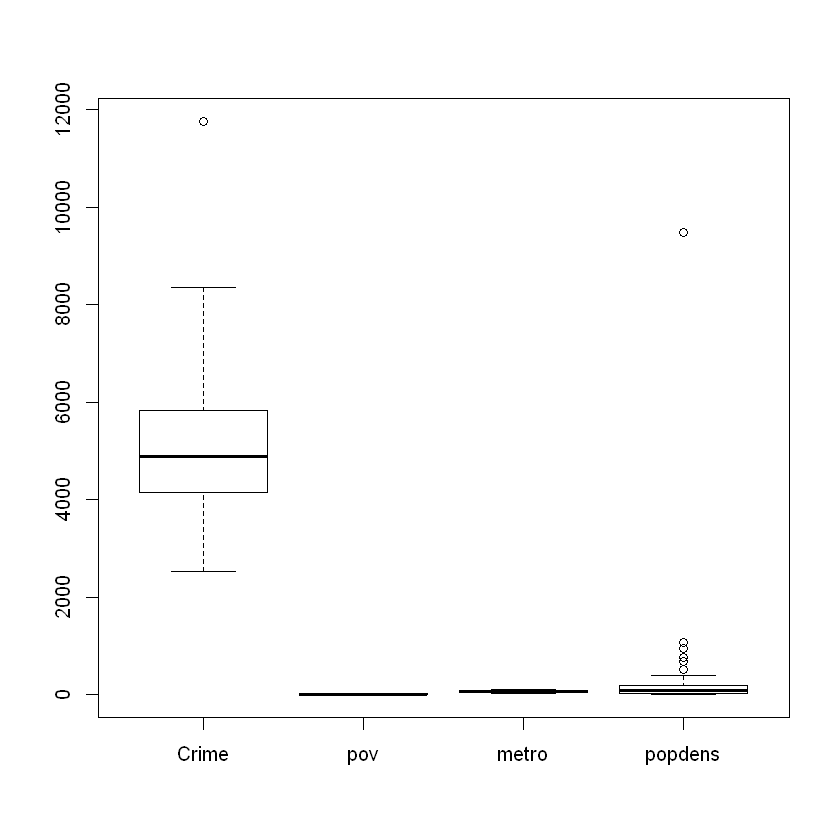

In [16]:
#Box Plot – Crime Variable
boxplot(crime)

In [17]:
summary(crime)

     Crime            pov            metro           popdens      
 Min.   : 2533   Min.   : 8.00   Min.   : 24.00   Min.   :   1.1  
 1st Qu.: 4140   1st Qu.:10.70   1st Qu.: 49.55   1st Qu.:  34.5  
 Median : 4894   Median :13.20   Median : 69.80   Median :  82.5  
 Mean   : 5098   Mean   :14.35   Mean   : 67.47   Mean   : 352.5  
 3rd Qu.: 5834   3rd Qu.:17.40   3rd Qu.: 83.95   3rd Qu.: 191.2  
 Max.   :11761   Max.   :26.40   Max.   :100.00   Max.   :9482.8  

**Outlier Detection**

Note from the descriptive statistics below that the mean value is 5098.33 but that a trimmed mean is 4986.16 
– a trimmed mean will typically exclude outlier values as they will be in the outer edges of a set of values 
and the fact that there is a considerable gap between these figures suggests that possible outliers are having a big impact on the data.

Assessing possible outliers and the box-plot shown above will explicitly identify such values.

**Possible outlier solutions;**

It may be possible that this is data entry error and needs to be investigated further, where the outlier is just wrong, in which case it should be deleted. An easy way to figure out if this is an legitimate outlier is to perform a test to remove the point that first noting the coefficients of the current model and then filter out that data point from the regression model. If there is little change in the model it is not an entry error and one should be concerned about its presence.

It’s possible that what appears to be just a couple outliers is in fact a power distribution. Consider transforming the variable if one of your variables has an asymmetric distribution (that is, it’s not remotely bell-shaped). 


In [18]:
#Multivariable regression tips and tricks
#Multiple Regression Model with many variables
library(mlbench)
lm.fit <- lm(Crime ~ pov + popdens + metro, data = crime)
lm.fit


Call:
lm(formula = Crime ~ pov + popdens + metro, data = crime)

Coefficients:
(Intercept)          pov      popdens        metro  
  1638.8046      83.2998       0.4563      31.1747  


In [19]:
#Make prediction
lm.predict <- predict(lm.fit)

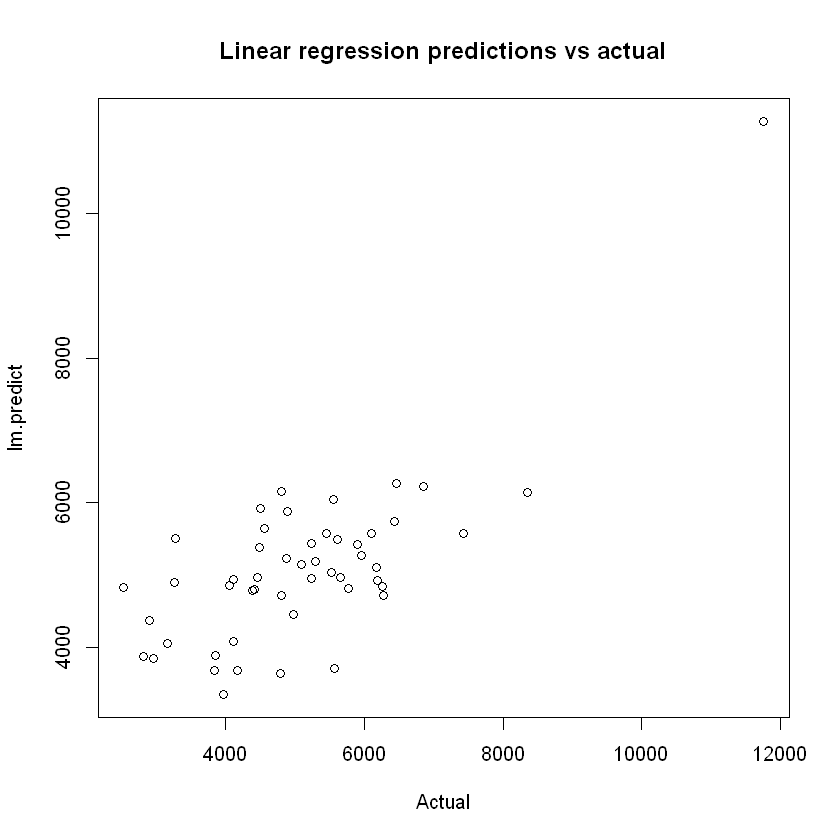

In [20]:
plot(crime$Crime, lm.predict, main="Linear regression predictions vs actual", xlab="Actual")

In [21]:
# Evaluate the results Smaller the Mean Square Error the better the model. Really big is a bad result
mean((lm.predict - crime$Crime)^2) 

[1] 1022973

In [22]:
summary(lm.fit)


Call:
lm(formula = Crime ~ pov + popdens + metro, data = crime)

Residuals:
     Min       1Q   Median       3Q      Max 
-2292.66  -810.68    91.43   628.04  2214.63 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1638.8046   774.6803   2.115 0.039719 *  
pov           83.2998    35.4091   2.352 0.022887 *  
popdens        0.4563     0.1280   3.566 0.000845 ***
metro         31.1747     7.3553   4.238 0.000104 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1054 on 47 degrees of freedom
Multiple R-squared:  0.5625,	Adjusted R-squared:  0.5346 
F-statistic: 20.14 on 3 and 47 DF,  p-value: 1.547e-08


In [23]:
#Correlation Co-efficients
coef(lm.fit)

(Intercept)          pov      popdens        metro 
1638.8046250   83.2997846    0.4563047   31.1746603

**Analysis & Results of the Multiple Linear Regression Model**

This section of the report analyzes a multiple linear regression model between the Y and the independent variables X1, X2 and X3.

Y = 1638.805+ 83.300X1 + 31.175 X2+ 0.456 X3

**Interpretation of the slope**
The Interpretation of slope coefficients in this model shows that the value of 83.300 for X1 poverty means that crime has increased to 83.300 for each rise of one unit in poverty. The value of 31.175 for Metro means that crime will increase by 31.175 units for each rise of one unit in state Metropolitan population %. For X3 Population Density indicates that crime will increase by 0.456 units for every one increase in the population per mile. This helps to assess the statistical significance of the estimated causal linkages. The adjusted r squared which takes into account the degrees of freedom (i.e. sample size) is lower at 0 .535 this is again a good increase from the 0.096 value for the simple linear regression with just poverty as the x variable.

**Standard Error**
When we look at the Standard error of the y estimate it is 1053.58187 this can be compared to the average value of Y for a measure of the overall fit of the regression. This has reduced considerably from the 1467.94954 value in the simple linear regression – the smaller this is, the better the fit of the regression. As this is derived from residuals, a relatively low standard error of the estimate is consistent with a relatively high r squared, this is likely to occur when we have a large sample and a well-specified regression model with small residuals.

**Analysis of R-squared**
The r squared value of .563 is important (this tells us that the two x variables now jointly explain 56.3% of the variation in y. This represents a considerable increase of the r squared value of 0 .115 (11.5%) when we used just poverty to predict total crimes. When we look at the adjusted r squared which takes account of degrees of freedom it is lower at 0.535 which is again a considerable increase from the 0.096 value for the simple linear regression with just Poverty as the only x variable.

The regression output states that we can be 99% confident that the slope for X1 lies between -11.762 and 176.110 as zero lies within this range we can say the slope is significant.  For X2 the slope lies between 11.407 and 49.338 and therefore is insignificant and we can say there is little significance in the slope for X3. 


**Residual Plots**

Residual = Observed – Predicted
Note: Positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.
The plot of the residuals are as follows:


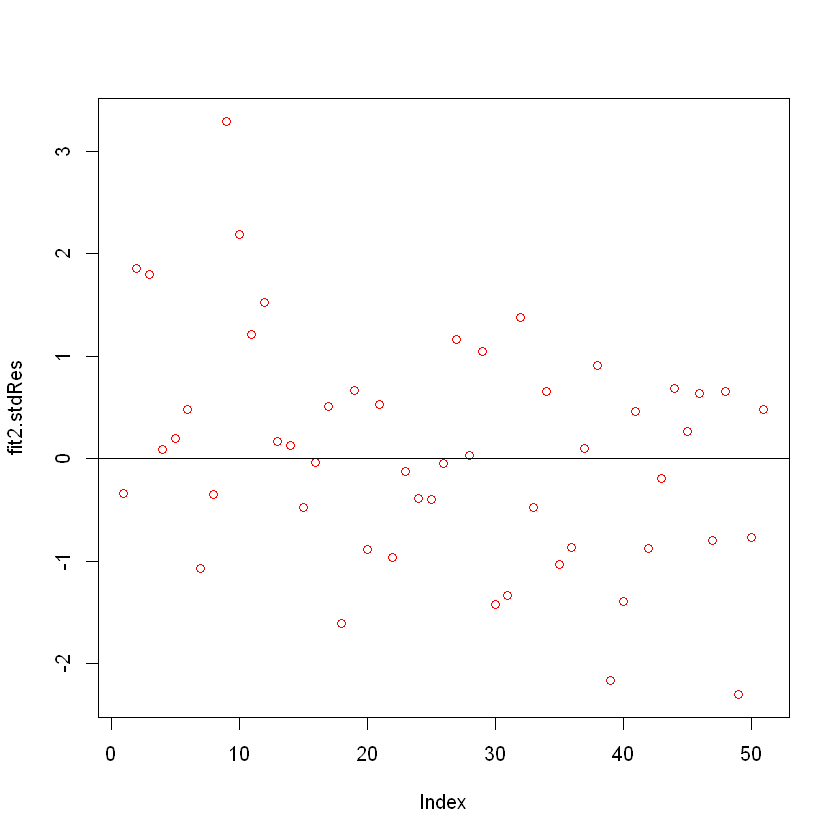

In [24]:
#Check the residuals and plot
fit2.stdRes = rstandard( lm.fit )
plot( fit2.stdRes, col="red")
abline(0,0)

The data points are not that symmetrically distributed, tending to cluster towards the middle of the plot with a small number of outlier points between 22 & 28. Most of the points are clustered around the lower single digits of the y-axis (e.g. 500 or 1,500, 2000 not 3000 or 4000). It can be noted that in general there aren’t any clear patterns.

These points on the plots are not evenly distributed vertically, or they have a clear shape to them, but they do have an outlier between 9000 & 10000 which indicates that the regression model has an outlying data point on an input variable, population density (outliers on and input variable are also known as “leverage points”. The low number of points in the data set may have an influence on the clustering of the data as seen above therefore by increasing the sample size to say 80 -100 data points would improve the spread of points. 

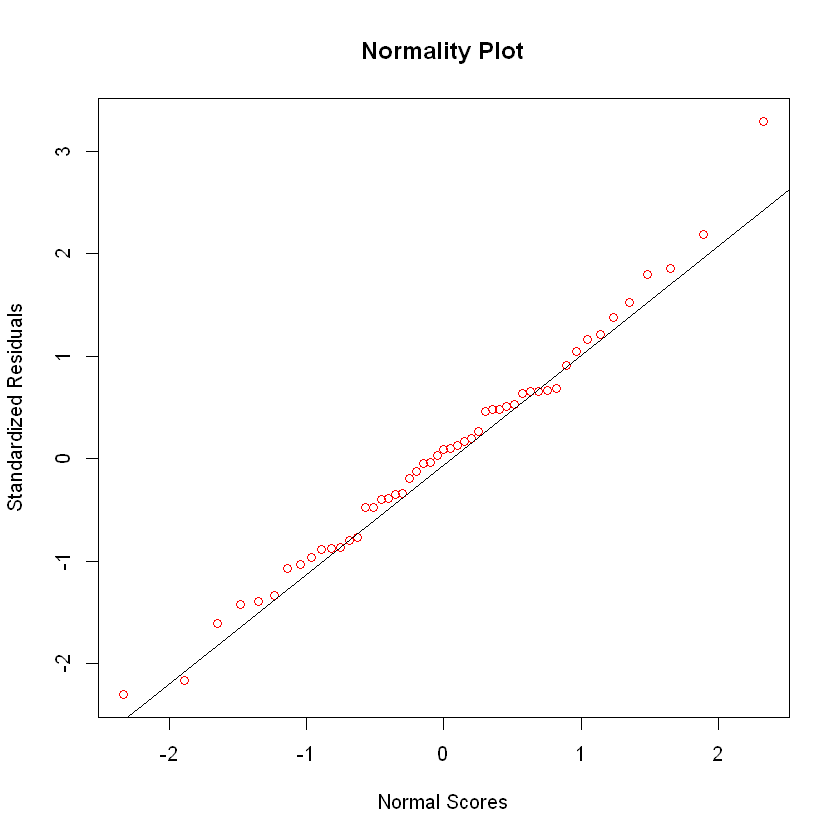

In [25]:
#Normality plot in R:
qqnorm(fit2.stdRes,ylab="Standardized Residuals",xlab="Normal Scores", main="Normality Plot", col="red")
qqline(fit2.stdRes)

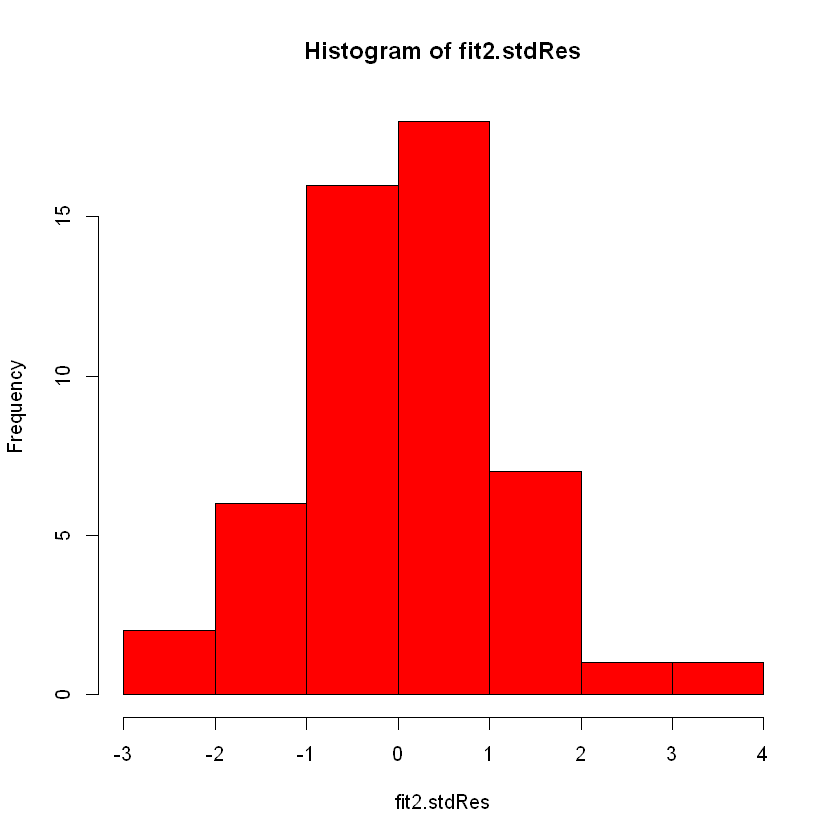

In [26]:
hist( fit2.stdRes, col="red")


In [27]:
#One way Anova on crime data 
crimeanova = read.csv( "C:/Clusters/Crime Statistics Anova.csv", header=TRUE)

In [28]:
crimeanova_dataset1 <- stack( crimeanova )

Warning message in stack.data.frame(crimeanova):
"non-vector columns will be ignored"

In [29]:
head(crimeanova_dataset1)

values,ind
4879,Group.1
5568,Group.1
7432,Group.1
4811,Group.1
6457,Group.1
5527,Group.1


In [30]:
#One way anova test
oneway.test( values ~ ind, var.equal=TRUE, data=crimeanova_dataset1 )
model <- aov( values ~ ind, data=crimeanova_dataset1 )
summary(model)


	One-way analysis of means

data:  values and ind
F = 2.986, num df = 6, denom df = 239, p-value = 0.007859


             Df    Sum Sq   Mean Sq F value  Pr(>F)   
ind           6 2.138e+11 3.564e+10   2.986 0.00786 **
Residuals   239 2.853e+12 1.194e+10                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
264 observations deleted due to missingness

**Conclusion**

Overall with some reservations this is a good regression model - it has a good sample size (over 50), a noticeable effect when you add variables to the model, and gave us an adjusted r squared of 0.535 which though not as high as we would like.
To conclude the multiple regression model this is averagely good, although I would recommend ways to make it better including a larger sample size greater than 51even though this is an acceptable sample set, additional data of a sample size of 100 could increase the predictability of the generated regression model, also including additional variables and observing the impact on the r squared and thus improving the quality of the data used. We could also add or eliminate a number of different dummy variables and to try conjure a much healthier adjusted r 2.
